In [1]:
import datetime
import numpy as np
import pandas as pd
import random

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

%matplotlib inline

import vasu
import vasu_strategy as strategy

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [17]:
STOCK_NAME = 'BPCL'
STOCK_PRICE_FILE = './../database/500547.csv'

In [18]:
price_data = pd.read_csv(STOCK_PRICE_FILE,index_col = 0, parse_dates = True,
                             usecols = [u'Date',u'Open Price', u'High Price', u'Low Price', u'Close Price'],
                             dtype= {u'Open Price':np.float64,u'High Price':np.float64,
                                     u'Low Price':np.float64,u'Close Price':np.float64}).sort_index()

In [24]:
sample_data = price_data.loc[datetime.date(year=2017, month=8,day=1):datetime.date(year=2018,month=11,day=29)]

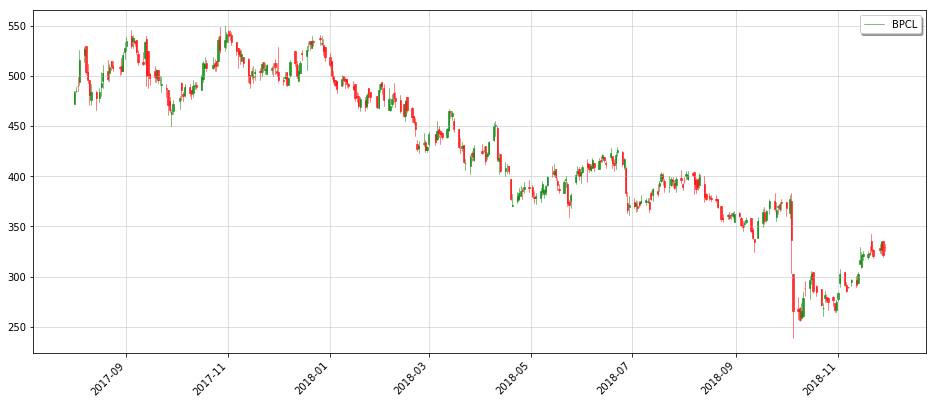

In [26]:
vasu.plot_candlestic(sample_data,STOCK_NAME)

In [6]:
def get_ma_slope(price_series, ma_period = 8, slope_period = 8):
    ma_series = price_series.rolling(ma_period).mean()[-slope_period:]
    y1 = ma_series[0]
    y2 = ma_series[slope_period-1]
    return (((y2-y1)/y1)*100)/slope_period

In [27]:
get_ma_slope(sample_data[u'Close Price'], ma_period = 200, slope_period = 8)

-0.17649436480150887

In [29]:
get_ma_slope(sample_data[u'Close Price'], ma_period = 50, slope_period = 8)

-0.11632825719120193

In [30]:
get_ma_slope(sample_data[u'Close Price'], ma_period = 20, slope_period = 8)

0.7813775795236778

In [33]:
trend_data = vasu.get_trend_data(price_data)

In [35]:
vasu.get_latest_peak_info(trend_data)

{'peak_type': 'low',
 'peak_data':             Open Price  High Price  Low Price  Close Price  high_slope  \
 Date                                                                     
 2018-11-22       326.2       327.9      318.0       320.55         NaN   
 
             low_slope          trend  
 Date                                  
 2018-11-22   1.254852  indeterminate  }

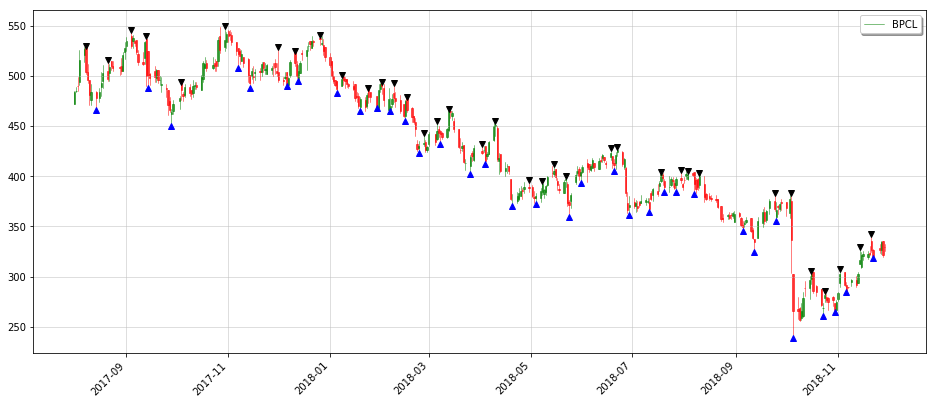

In [36]:
peak_indices = vasu.get_peak_indices(sample_data)
trough_indices = vasu.get_trough_indices(sample_data)
vasu.plot_candlestic_with_extrema(sample_data,peak_indices,trough_indices,STOCK_NAME)